In [2]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pylab as plt
import seaborn as sn
import numpy as np

In [3]:
df = pd.read_csv("data/sp500/csv/AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values(by='Date')

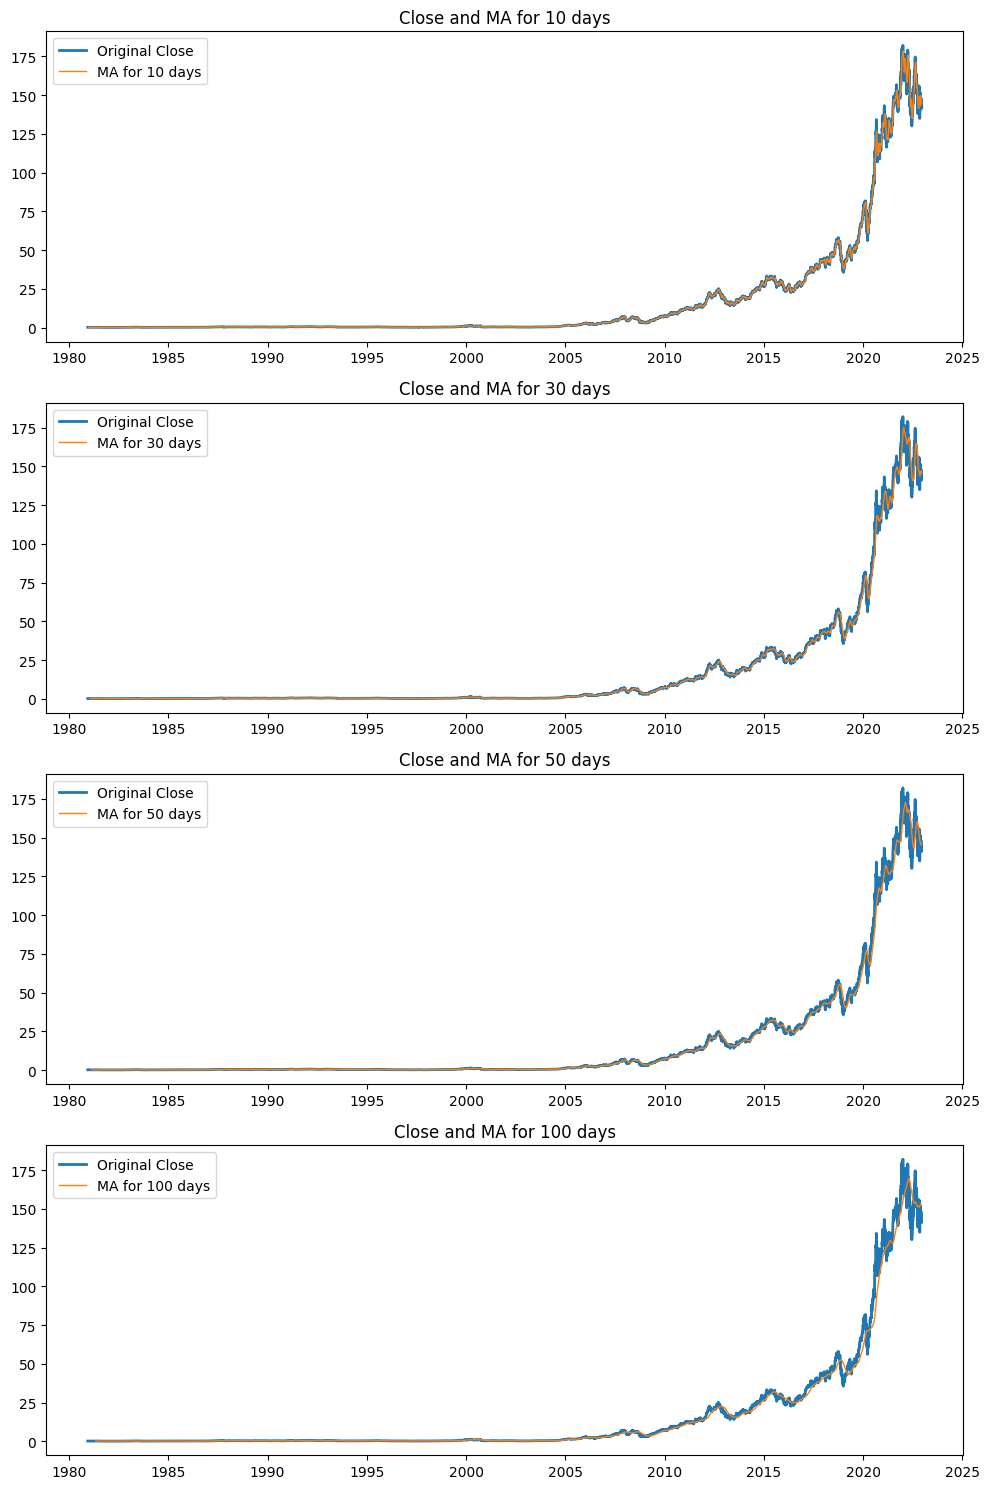

In [4]:
ma_day = [10, 30, 50, 100]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=len(ma_day), ncols=1, figsize=(10, 15))

for i, ma in enumerate(ma_day):
    column_name = f"MA for {ma} days"
    axes[i].plot(df['Date'],df['Close'], label='Original Close', linewidth=2)
    axes[i].plot(df['Date'],df[column_name], label=f'{column_name}', linewidth=1)
    axes[i].set_title(f'Close and {column_name}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [9]:
ma_window = 30  # Window for the moving average
roc_window = 10  # Window for the rate of change

# Calculating the 21-day moving average
df['30-Day MA'] = df['Close'].rolling(window=ma_window).mean()

# Calculating the 5-day rate of change of the 21-day moving average
df['MA Rate of Change'] = df['30-Day MA'].pct_change(periods=roc_window) * 100

train_size = int(len(df) * 0.9)
val_size = int(len(df) * 0.05)
train = df.iloc[:train_size, :]
val = df.iloc[train_size : train_size + val_size, :]
test = df.iloc[train_size + val_size :, :]

# Calculating the MA and rate of change for the training data
train['30-Day MA'] = train['Close'].rolling(window=ma_window).mean()
train['MA Rate of Change'] = train['30-Day MA'].pct_change(periods=roc_window) * 100

# Calculating the MA and rate of change for the testing data
# Note: The moving average for the test set starts from the last point of the training set
last_ma_value = train['30-Day MA'].iloc[-1]
test['30-Day MA'] = pd.concat([train['Close'], test['Close']]).rolling(window=ma_window).mean().iloc[train_size:]
test['MA Rate of Change'] = test['30-Day MA'].pct_change(periods=roc_window) * 100

# Displaying the last few rows of the training and testing datasets
train_data_tail = train[['Close', '30-Day MA', 'MA Rate of Change']].tail()
test_data_head = test[['Close', '30-Day MA', 'MA Rate of Change']].head()

train_data_tail, test_data_head

/var/folders/fb/7_4yf_c520g4241wpnlcdznh0000gn/T/ipykernel_19493/3432403797.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['30-Day MA'] = train['Close'].rolling(window=ma_window).mean()
/var/folders/fb/7_4yf_c520g4241wpnlcdznh0000gn/T/ipykernel_19493/3432403797.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['MA Rate of Change'] = train['30-Day MA'].pct_change(periods=roc_window) * 100
/var/folders/fb/7_4yf_c520g4241wpnlcdznh0000gn/T/ipykernel_19493/3432403797.py:23: SettingWithCopyWa

(          Close  30-Day MA  MA Rate of Change
 9526  54.415001  54.692334           2.905561
 9527  55.197498  54.802834           2.673174
 9528  55.547501  54.913834           2.338851
 9529  55.105000  55.002750           2.016897
 9530  56.237499  55.125334           1.852111,
             Close  30-Day MA  MA Rate of Change
 10060  114.949997  57.179333                NaN
 10061  119.029999  59.333833                NaN
 10062  118.690002  61.494667                NaN
 10063  116.320000  63.580000                NaN
 10064  115.970001  65.653584                NaN)

In [14]:
# Reimplementing the binning with proper handling of NaN values
def bin_roc(roc_value):
    if pd.isna(roc_value):
        return 'Unknown'  # Handling NaN values separately
    elif roc_value > 10:
        return 'High Positive'
    elif roc_value > 5:
        return 'Low Positive'
    elif roc_value > -5:
        return 'Neutral'
    elif roc_value > -10:
        return 'Low Negative'
    else:
        return 'High Negative'

# Applying the binning function to the training and testing data again
train['ROC Binned'] = train['MA Rate of Change'].apply(bin_roc)
test['ROC Binned'] = test['MA Rate of Change'].apply(bin_roc)


train.to_csv('data/sp500/prova.csv', index=False)


/var/folders/fb/7_4yf_c520g4241wpnlcdznh0000gn/T/ipykernel_19493/242020127.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ROC Binned'] = train['MA Rate of Change'].apply(bin_roc)
/var/folders/fb/7_4yf_c520g4241wpnlcdznh0000gn/T/ipykernel_19493/242020127.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ROC Binned'] = test['MA Rate of Change'].apply(bin_roc)
